In [15]:
import os
import re

import pandas as pd
import rioxarray
import xarray as xr

# Base directory
base_dir = "/home/jovyan/grid4earth_S2L1B/Sentinel-2/MSI/MSI_L1B_GR/2025/07/24"

# Band suffixes of interest
band_ids = [
    "B01",
    "B02",
    "B03",
    "B04",
    "B05",
    "B06",
    "B07",
    "B08",
    "B09",
    "B10",
    "B11",
    "B12",
    "B8A",
]

# List SAFE folders
safe_dirs = sorted(
    [
        d
        for d in os.listdir(base_dir)
        if os.path.isdir(os.path.join(base_dir, d)) and d.endswith(".11")
    ]
)

# Container for time-stamped datasets
ds_list = []

for safe_name in safe_dirs:
    safe_path = os.path.join(base_dir, safe_name)
    img_data_dir = os.path.join(safe_path, "IMG_DATA")

    print(f"\n📦 Processing: {safe_name}")

    # Extract sensing time from the filename, between "_S" and "_D"
    match = re.search(r"_S(\d{8}T\d{6})_D", safe_name)
    if not match:
        print(f"❌ No timestamp found in {safe_name}")
        continue

    timestamp_str = match.group(1)
    timestamp = pd.to_datetime(timestamp_str, format="%Y%m%dT%H%M%S")

    data_vars = {}
    ref_da = None

    for band in band_ids:
        band_files = [f for f in os.listdir(img_data_dir) if f.endswith(f"{band}.jp2")]
        if not band_files:
            print(f"⚠️  Missing {band} in {safe_name}")
            continue

        path = os.path.join(img_data_dir, band_files[0])
        da = rioxarray.open_rasterio(path, masked=True).squeeze()

        # Use the first band as the shape reference
        if ref_da is None:
            ref_da = da
        # No CRS or reprojection handled here

        data_vars[band] = da

    if not data_vars:
        print("🚫 No bands loaded, skipping.")
        continue

    # Create Dataset and add time as a coordinate
    ds = xr.Dataset(data_vars)
    ds = ds.expand_dims(time=[timestamp])
    ds_list.append(ds)

# Combine all time-stamped datasets
if ds_list:
    ds_all = xr.concat(ds_list, dim="time")
    print("\n✅ Combined dataset with time dimension:")
    print(ds_all)
    # Optionally save:
    # ds_all.to_zarr("Sentinel2_L1B_timeseries.zarr", mode="w")
else:
    print("\n🚫 No datasets to combine.")


📦 Processing: S2A_OPER_MSI_L1B_GR_2APS_20250724T145646_S20250724T112804_D06_N05.11


/srv/conda/envs/eopf/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/srv/conda/envs/eopf/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/srv/conda/envs/eopf/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/srv/conda/envs/eopf/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_w


📦 Processing: S2A_OPER_MSI_L1B_GR_2APS_20250724T145646_S20250724T112807_D06_N05.11


/srv/conda/envs/eopf/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/srv/conda/envs/eopf/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/srv/conda/envs/eopf/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/srv/conda/envs/eopf/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_w


📦 Processing: S2A_OPER_MSI_L1B_GR_2APS_20250724T145646_S20250724T112808_D07_N05.11


/srv/conda/envs/eopf/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/srv/conda/envs/eopf/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/srv/conda/envs/eopf/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/srv/conda/envs/eopf/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_w


📦 Processing: S2A_OPER_MSI_L1B_GR_2APS_20250724T145646_S20250724T112811_D06_N05.11


/srv/conda/envs/eopf/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/srv/conda/envs/eopf/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/srv/conda/envs/eopf/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/srv/conda/envs/eopf/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_w


📦 Processing: S2A_OPER_MSI_L1B_GR_2APS_20250724T145646_S20250724T112811_D07_N05.11


/srv/conda/envs/eopf/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/srv/conda/envs/eopf/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/srv/conda/envs/eopf/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/srv/conda/envs/eopf/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_w


📦 Processing: S2A_OPER_MSI_L1B_GR_2APS_20250724T145646_S20250724T112815_D07_N05.11


/srv/conda/envs/eopf/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/srv/conda/envs/eopf/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/srv/conda/envs/eopf/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/srv/conda/envs/eopf/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_w


📦 Processing: S2A_OPER_MSI_L1B_GR_2APS_20250724T145646_S20250724T112818_D07_N05.11


/srv/conda/envs/eopf/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/srv/conda/envs/eopf/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/srv/conda/envs/eopf/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/srv/conda/envs/eopf/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_w


✅ Combined dataset with time dimension:
<xarray.Dataset> Size: 2GB
Dimensions:      (time: 7, y: 2304, x: 2552)
Coordinates:
  * time         (time) datetime64[ns] 56B 2025-07-24T11:28:04 ... 2025-07-24...
  * x            (x) float64 20kB 0.5 1.5 2.5 ... 2.55e+03 2.55e+03 2.552e+03
  * y            (y) float64 18kB 0.5 1.5 2.5 ... 2.302e+03 2.302e+03 2.304e+03
    band         int64 8B 1
    spatial_ref  int64 8B 0
Data variables: (12/13)
    B01          (time, y, x) float32 165MB 377.0 377.0 377.0 ... nan nan nan
    B02          (time, y, x) float32 165MB 292.0 296.0 298.0 ... 299.0 298.0
    B03          (time, y, x) float32 165MB 237.0 235.0 227.0 ... 238.0 244.0
    B04          (time, y, x) float32 165MB 180.0 175.0 180.0 ... 188.0 192.0
    B05          (time, y, x) float32 165MB 176.0 178.0 175.0 ... nan nan nan
    B06          (time, y, x) float32 165MB 159.0 161.0 162.0 ... nan nan nan
    ...           ...
    B08          (time, y, x) float32 165MB 153.0 151.0 150.0 ...

In [16]:
ds_all

<xarray.Dataset> Size: 2GB
Dimensions:      (time: 7, y: 2304, x: 2552)
Coordinates:
  * time         (time) datetime64[ns] 56B 2025-07-24T11:28:04 ... 2025-07-24...
  * x            (x) float64 20kB 0.5 1.5 2.5 ... 2.55e+03 2.55e+03 2.552e+03
  * y            (y) float64 18kB 0.5 1.5 2.5 ... 2.302e+03 2.302e+03 2.304e+03
    band         int64 8B 1
    spatial_ref  int64 8B 0
Data variables: (12/13)
    B01          (time, y, x) float32 165MB 377.0 377.0 377.0 ... nan nan nan
    B02          (time, y, x) float32 165MB 292.0 296.0 298.0 ... 299.0 298.0
    B03          (time, y, x) float32 165MB 237.0 235.0 227.0 ... 238.0 244.0
    B04          (time, y, x) float32 165MB 180.0 175.0 180.0 ... 188.0 192.0
    B05          (time, y, x) float32 165MB 176.0 178.0 175.0 ... nan nan nan
    B06          (time, y, x) float32 165MB 159.0 161.0 162.0 ... nan nan nan
    ...           ...
    B08          (time, y, x) float32 165MB 153.0 151.0 150.0 ... 161.0 162.0
    B09          (time, y, x) float32 165MB 117.0 118.0 117.0 ... nan nan nan
    B10          (time, y, x) float32 165MB 104.0 104.0 104.0 ... nan nan nan
    B11          (time, y, x) float32 165MB 137.0 143.0 143.0 ... nan nan nan
    B12          (time, y, x) float32 165MB 128.0 137.0 132.0 ... nan nan nan
    B8A          (time, y, x) float32 165MB 137.0 146.0 144.0 ... nan nan nan

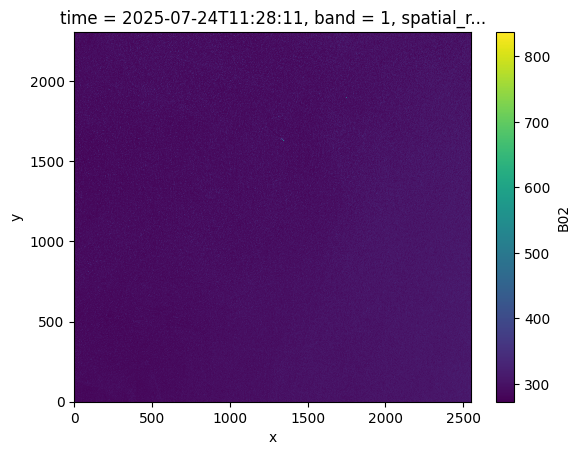

In [20]:
ds_all.B02.isel(time=3).plot()

In [21]:
ds_all.to_zarr("s2l1b_tmp.zarr")

/srv/conda/envs/eopf/lib/python3.11/site-packages/xarray/core/dataset.py:2621: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/srv/conda/envs/eopf/lib/python3.11/site-packages/xarray/core/duck_array_ops.py:226: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
/srv/conda/envs/eopf/lib/python3.11/site-packages/xarray/core/dataset.py:2621: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/srv/conda/envs/eopf/lib/python3.11/site-packages/xarray/core/duck_array_ops.py:226: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)


In [26]:
xr.open_zarr("https://data-taos.ifremer.fr/GRID4EARTH/s2l1b_tmp.zarr")

<xarray.Dataset> Size: 4GB
Dimensions:      (time: 7, y: 2304, x: 2552)
Coordinates:
    band         int64 8B ...
  * time         (time) datetime64[ns] 56B 2025-07-24T11:28:04 ... 2025-07-24...
  * x            (x) float64 20kB 0.5 1.5 2.5 ... 2.55e+03 2.55e+03 2.552e+03
  * y            (y) float64 18kB 0.5 1.5 2.5 ... 2.302e+03 2.302e+03 2.304e+03
Data variables: (12/14)
    B01          (time, y, x) float64 329MB dask.array<chunksize=(1, 576, 638), meta=np.ndarray>
    B02          (time, y, x) float64 329MB dask.array<chunksize=(1, 576, 638), meta=np.ndarray>
    B03          (time, y, x) float64 329MB dask.array<chunksize=(1, 576, 638), meta=np.ndarray>
    B04          (time, y, x) float64 329MB dask.array<chunksize=(1, 576, 638), meta=np.ndarray>
    B05          (time, y, x) float64 329MB dask.array<chunksize=(1, 576, 638), meta=np.ndarray>
    B06          (time, y, x) float64 329MB dask.array<chunksize=(1, 576, 638), meta=np.ndarray>
    ...           ...
    B09          (time, y, x) float64 329MB dask.array<chunksize=(1, 576, 638), meta=np.ndarray>
    B10          (time, y, x) float64 329MB dask.array<chunksize=(1, 576, 638), meta=np.ndarray>
    B11          (time, y, x) float64 329MB dask.array<chunksize=(1, 576, 638), meta=np.ndarray>
    B12          (time, y, x) float64 329MB dask.array<chunksize=(1, 576, 638), meta=np.ndarray>
    B8A          (time, y, x) float64 329MB dask.array<chunksize=(1, 576, 638), meta=np.ndarray>
    spatial_ref  int64 8B ...

In [25]:
xr.open_zarr("s2l1b_tmp.zarr")

<xarray.Dataset> Size: 4GB
Dimensions:      (time: 7, y: 2304, x: 2552)
Coordinates:
    band         int64 8B ...
  * time         (time) datetime64[ns] 56B 2025-07-24T11:28:04 ... 2025-07-24...
  * x            (x) float64 20kB 0.5 1.5 2.5 ... 2.55e+03 2.55e+03 2.552e+03
  * y            (y) float64 18kB 0.5 1.5 2.5 ... 2.302e+03 2.302e+03 2.304e+03
Data variables: (12/14)
    B01          (time, y, x) float64 329MB dask.array<chunksize=(1, 576, 638), meta=np.ndarray>
    B02          (time, y, x) float64 329MB dask.array<chunksize=(1, 576, 638), meta=np.ndarray>
    B03          (time, y, x) float64 329MB dask.array<chunksize=(1, 576, 638), meta=np.ndarray>
    B04          (time, y, x) float64 329MB dask.array<chunksize=(1, 576, 638), meta=np.ndarray>
    B05          (time, y, x) float64 329MB dask.array<chunksize=(1, 576, 638), meta=np.ndarray>
    B06          (time, y, x) float64 329MB dask.array<chunksize=(1, 576, 638), meta=np.ndarray>
    ...           ...
    B09          (time, y, x) float64 329MB dask.array<chunksize=(1, 576, 638), meta=np.ndarray>
    B10          (time, y, x) float64 329MB dask.array<chunksize=(1, 576, 638), meta=np.ndarray>
    B11          (time, y, x) float64 329MB dask.array<chunksize=(1, 576, 638), meta=np.ndarray>
    B12          (time, y, x) float64 329MB dask.array<chunksize=(1, 576, 638), meta=np.ndarray>
    B8A          (time, y, x) float64 329MB dask.array<chunksize=(1, 576, 638), meta=np.ndarray>
    spatial_ref  int64 8B ...

In [41]:
import xml.etree.ElementTree as ET

import numpy as np

xml_path = "S2A_OPER_MSI_L1B_GR_2APS_20250724T145646_S20250724T112807_D06_N05.11.SAFE/S2A_OPER_MTD_L1B_GR_2APS_20250724T145646_S20250724T112807_D06.xml"

import xml.etree.ElementTree as ET

import numpy as np

xml_path = "S2A_OPER_MSI_L1B_GR_2APS_20250724T145646_S20250724T112807_D06_N05.11.SAFE/S2A_OPER_MTD_L1B_GR_2APS_20250724T145646_S20250724T112807_D06.xml"

tree = ET.parse(xml_path)
root = tree.getroot()

# No namespace: just find the tag!
el = root.find(".//EXT_POS_LIST")
if el is not None:
    pos_list = el.text.strip().split()
else:
    raise ValueError("Could not find EXT_POS_LIST in the XML.")

coords = np.array(list(map(float, pos_list))).reshape(-1, 3)  # shape: (5, 3)
latlons = coords[:4, :2]

# 10m band image shape
nrows, ncols = 2304, 2552

# Assign corners
UL = latlons[0]  # Upper Left
LL = latlons[1]  # Lower Left
LR = latlons[2]  # Lower Right
UR = latlons[3]  # Upper Right

# Bilinear interpolation
rows = np.linspace(0, 1, nrows)
cols = np.linspace(0, 1, ncols)
grid_rows, grid_cols = np.meshgrid(rows, cols, indexing="ij")

lat_grid = (
    (1 - grid_rows) * (1 - grid_cols) * UL[0]
    + grid_rows * (1 - grid_cols) * LL[0]
    + grid_rows * grid_cols * LR[0]
    + (1 - grid_rows) * grid_cols * UR[0]
)
lon_grid = (
    (1 - grid_rows) * (1 - grid_cols) * UL[1]
    + grid_rows * (1 - grid_cols) * LL[1]
    + grid_rows * grid_cols * LR[1]
    + (1 - grid_rows) * grid_cols * UR[1]
)

print("lat_grid shape:", lat_grid.shape)
print("lon_grid shape:", lon_grid.shape)

lat_grid shape: (2304, 2552)
lon_grid shape: (2304, 2552)


In [42]:
lat_grid

array([[48.53466278, 48.53463936, 48.53461594, ..., 48.4749643 ,
        48.47494088, 48.47491746],
       [48.53457166, 48.53454824, 48.53452482, ..., 48.47487324,
        48.47484982, 48.4748264 ],
       [48.53448054, 48.53445712, 48.5344337 , ..., 48.47478219,
        48.47475877, 48.47473535],
       ...,
       [48.32499902, 48.32497566, 48.3249523 , ..., 48.26545309,
        48.26542973, 48.26540637],
       [48.3249079 , 48.32488454, 48.32486118, ..., 48.26536204,
        48.26533868, 48.26531532],
       [48.32481679, 48.32479342, 48.32477006, ..., 48.26527099,
        48.26524763, 48.26522427]], shape=(2304, 2552))

In [4]:
import os
import xml.etree.ElementTree as ET

import numpy as np
import rioxarray
import xarray as xr


def load_band_with_latlon(band_path, xml_path):
    """
    Returns an xarray.Dataset with:
      - band data (named after the band, e.g. 'B04'),
      - latitude grid,
      - longitude grid,
    for the given Sentinel-2 L1B band and its metadata XML.
    """
    # Load the band
    da = rioxarray.open_rasterio(band_path, masked=True)
    # Remove band dimension if present
    if "band" in da.dims and da.sizes["band"] == 1:
        da = da.squeeze("band")
    nrows, ncols = da.shape[-2], da.shape[-1]
    y_dim, x_dim = da.dims[-2], da.dims[-1]

    # Parse XML for the EXT_POS_LIST tag
    tree = ET.parse(xml_path)
    root = tree.getroot()
    el = root.find(".//EXT_POS_LIST")
    if el is None:
        raise ValueError(f"Could not find EXT_POS_LIST in {xml_path}")

    pos_list = el.text.strip().split()
    coords = np.array(list(map(float, pos_list))).reshape(-1, 3)
    latlons = coords[:4, :2]
    print(latlons)
    UL, LL, LR, UR = latlons

    # Interpolation
    rows = np.linspace(0, 1, nrows)
    cols = np.linspace(0, 1, ncols)
    grid_rows, grid_cols = np.meshgrid(rows, cols, indexing="ij")
    lat_grid = (
        (1 - grid_rows) * (1 - grid_cols) * UL[0]
        + grid_rows * (1 - grid_cols) * LL[0]
        + grid_rows * grid_cols * LR[0]
        + (1 - grid_rows) * grid_cols * UR[0]
    )
    lon_grid = (
        (1 - grid_rows) * (1 - grid_cols) * UL[1]
        + grid_rows * (1 - grid_cols) * LL[1]
        + grid_rows * grid_cols * LR[1]
        + (1 - grid_rows) * grid_cols * UR[1]
    )

    band_name = os.path.basename(band_path).split("_")[-1].split(".")[0]

    # Build xarray.Dataset (lat/lon must have dims y_dim, x_dim)
    ds = xr.Dataset(
        data_vars={
            band_name: (da.dims, da.values),
            "latitude": ((y_dim, x_dim), lat_grid),
            "longitude": ((y_dim, x_dim), lon_grid),
        },
        coords={y_dim: da[y_dim], x_dim: da[x_dim]},
    )
    return ds


# Example usage:
# band_path = "S2A_OPER_MSI_L1B_GR_2APS_20250724T145646_S20250724T112807_D06_N05.11.SAFE/IMG_DATA/S2A_OPER_MSI_L1B_GR_2APS_20250724T145646_S20250724T112807_D06_B04.jp2"
# xml_path  = "S2A_OPER_MSI_L1B_GR_2APS_20250724T145646_S20250724T112807_D06_N05.11.SAFE/S2A_OPER_MTD_L1B_GR_2APS_20250724T145646_S20250724T112807_D06.xml"
# ds = load_band_with_latlon(band_path, xml_path)
# print(ds)import numpy as np
import os
import xml.etree.ElementTree as ET

import rioxarray
import xarray as xr


def load_band_with_latlon(band_path, xml_path):
    """
    Returns an xarray.Dataset with:
      - band data (named after the band, e.g. 'B04'),
      - latitude grid,
      - longitude grid,
    for the given Sentinel-2 L1B band and its metadata XML.
    """
    # Load the band
    da = rioxarray.open_rasterio(band_path, masked=True)
    # Remove band dimension if present
    if "band" in da.dims and da.sizes["band"] == 1:
        da = da.squeeze("band")
    nrows, ncols = da.shape[-2], da.shape[-1]
    y_dim, x_dim = da.dims[-2], da.dims[-1]

    # Parse XML for the EXT_POS_LIST tag
    tree = ET.parse(xml_path)
    root = tree.getroot()
    el = root.find(".//EXT_POS_LIST")
    if el is None:
        raise ValueError(f"Could not find EXT_POS_LIST in {xml_path}")

    pos_list = el.text.strip().split()
    coords = np.array(list(map(float, pos_list))).reshape(-1, 3)
    latlons = coords[:4, :2]
    print(latlons)
    UL, LL, LR, UR = latlons

    # Interpolation
    rows = np.linspace(0, 1, nrows)
    cols = np.linspace(0, 1, ncols)
    grid_rows, grid_cols = np.meshgrid(rows, cols, indexing="ij")
    lat_grid = (
        (1 - grid_rows) * (1 - grid_cols) * UL[0]
        + grid_rows * (1 - grid_cols) * LL[0]
        + grid_rows * grid_cols * LR[0]
        + (1 - grid_rows) * grid_cols * UR[0]
    )
    lon_grid = (
        (1 - grid_rows) * (1 - grid_cols) * UL[1]
        + grid_rows * (1 - grid_cols) * LL[1]
        + grid_rows * grid_cols * LR[1]
        + (1 - grid_rows) * grid_cols * UR[1]
    )

    band_name = os.path.basename(band_path).split("_")[-1].split(".")[0]

    # Build xarray.Dataset (lat/lon must have dims y_dim, x_dim)
    ds = xr.Dataset(
        data_vars={
            band_name: (da.dims, da.values),
            "latitude": ((y_dim, x_dim), lat_grid),
            "longitude": ((y_dim, x_dim), lon_grid),
        },
        coords={y_dim: da[y_dim], x_dim: da[x_dim]},
    )
    return ds


detector = "D06"
# Example usage:
band_path = "Sentinel-2/MSI/MSI_L1B_GR/2025/07/24/S2A_OPER_MSI_L1B_GR_2APS_20250724T145646_S20250724T112804_D06_N05.11/IMG_DATA/S2A_OPER_MSI_L1B_GR_2APS_20250724T145646_S20250724T112804_D06_B02.jp2"
xml_path = "Sentinel-2/MSI/MSI_L1B_GR/2025/07/24/S2A_OPER_MSI_L1B_GR_2APS_20250724T145646_S20250724T112804_D06_N05.11/S2A_OPER_MTD_L1B_GR_2APS_20250724T145646_S20250724T112804_D06.xml"

# ds = l
ds = load_band_with_latlon(band_path, xml_path)
ds
# print(ds)

/srv/conda/envs/eopf/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


[[48.74445804 -4.94862613]
 [48.53475388 -5.03523615]
 [48.47500856 -4.70260749]
 [48.68454275 -4.61466751]]


<xarray.Dataset> Size: 118MB
Dimensions:      (y: 2304, x: 2552)
Coordinates:
    band         int64 8B 1
  * y            (y) float64 18kB 0.5 1.5 2.5 ... 2.302e+03 2.302e+03 2.304e+03
    spatial_ref  int64 8B 0
  * x            (x) float64 20kB 0.5 1.5 2.5 ... 2.55e+03 2.55e+03 2.552e+03
Data variables:
    B02          (y, x) float32 24MB 292.0 296.0 298.0 ... 350.0 348.0 351.0
    latitude     (y, x) float64 47MB 48.74 48.74 48.74 ... 48.48 48.48 48.48
    longitude    (y, x) float64 47MB -4.949 -4.948 -4.948 ... -4.703 -4.703

In [54]:
# 2804
# ds.chunk(512).to_zarr('S2A_OPER_MSI_L1B_GR_2APS_20250724T145646_S20250724T112804_D06_N05.11_B02.zarr',mode='w')

In [55]:
xr.open_zarr(
    "S2A_OPER_MSI_L1B_GR_2APS_20250724T145646_S20250724T112804_D06_N05.11_B02.zarr"
)

<xarray.Dataset> Size: 118MB
Dimensions:      (y: 2304, x: 2552)
Coordinates:
    band         int64 8B ...
    spatial_ref  int64 8B ...
  * x            (x) float64 20kB 0.5 1.5 2.5 ... 2.55e+03 2.55e+03 2.552e+03
  * y            (y) float64 18kB 0.5 1.5 2.5 ... 2.302e+03 2.302e+03 2.304e+03
Data variables:
    B02          (y, x) float32 24MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    latitude     (y, x) float64 47MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    longitude    (y, x) float64 47MB dask.array<chunksize=(512, 512), meta=np.ndarray>

In [8]:
import xarray as xr

ds = xr.open_zarr(
    "https://data-taos.ifremer.fr/GRID4EARTH/S2A_OPER_MSI_L1B_GR_2APS_20250724T145646_S20250724T112804_D06_N05.11_B02.zarr"
)
# Pick your variables
b = ds["B02"]  # or any band
lat = ds["latitude"]
lon = ds["longitude"]

In [4]:
import numpy as np

# Your coordinates
lat0, lon0 = 48.4375, -4.7708

lat_grid = ds["latitude"].values
lon_grid = ds["longitude"].values

# Compute distance to Lanildut for every pixel
dist = np.sqrt((lat_grid - lat0) ** 2 + (lon_grid - lon0) ** 2)
iy, ix = np.unravel_index(np.argmin(dist), dist.shape)
print(f"Lanildut closest pixel: y={iy}, x={ix}")

Lanildut closest pixel: y=2303, x=2094


In [5]:
# Define window size
win = 256  # half size, so 512=256*2

# Ensure indices stay within image bounds
y1 = max(iy - win, 0)
y2 = min(iy + win, lat_grid.shape[0])
x1 = max(ix - win, 0)
x2 = min(ix + win, lat_grid.shape[1])

# Slice your data
b = ds["B02"].isel(y=slice(y1, y2), x=slice(x1, x2))
lat_win = ds["latitude"].isel(y=slice(y1, y2), x=slice(x1, x2))
lon_win = ds["longitude"].isel(y=slice(y1, y2), x=slice(x1, x2))

In [9]:
import matplotlib.pyplot as plt

# Use the previous code to extract b, lat_win, lon_win
# plt.imsave('s2_window.png', b.values, cmap='gray')
import numpy as np

# Flatten to exclude NaNs
vals = b.values.flatten()
vals = vals[np.isfinite(vals)]

vmin, vmax = np.percentile(vals, [10, 90])  # 2nd to 98th percentile stretch

img_norm = np.clip((b.values - vmin) / (vmax - vmin), 0, 1)

plt.imsave("s2_window.png", img_norm, cmap="gray")


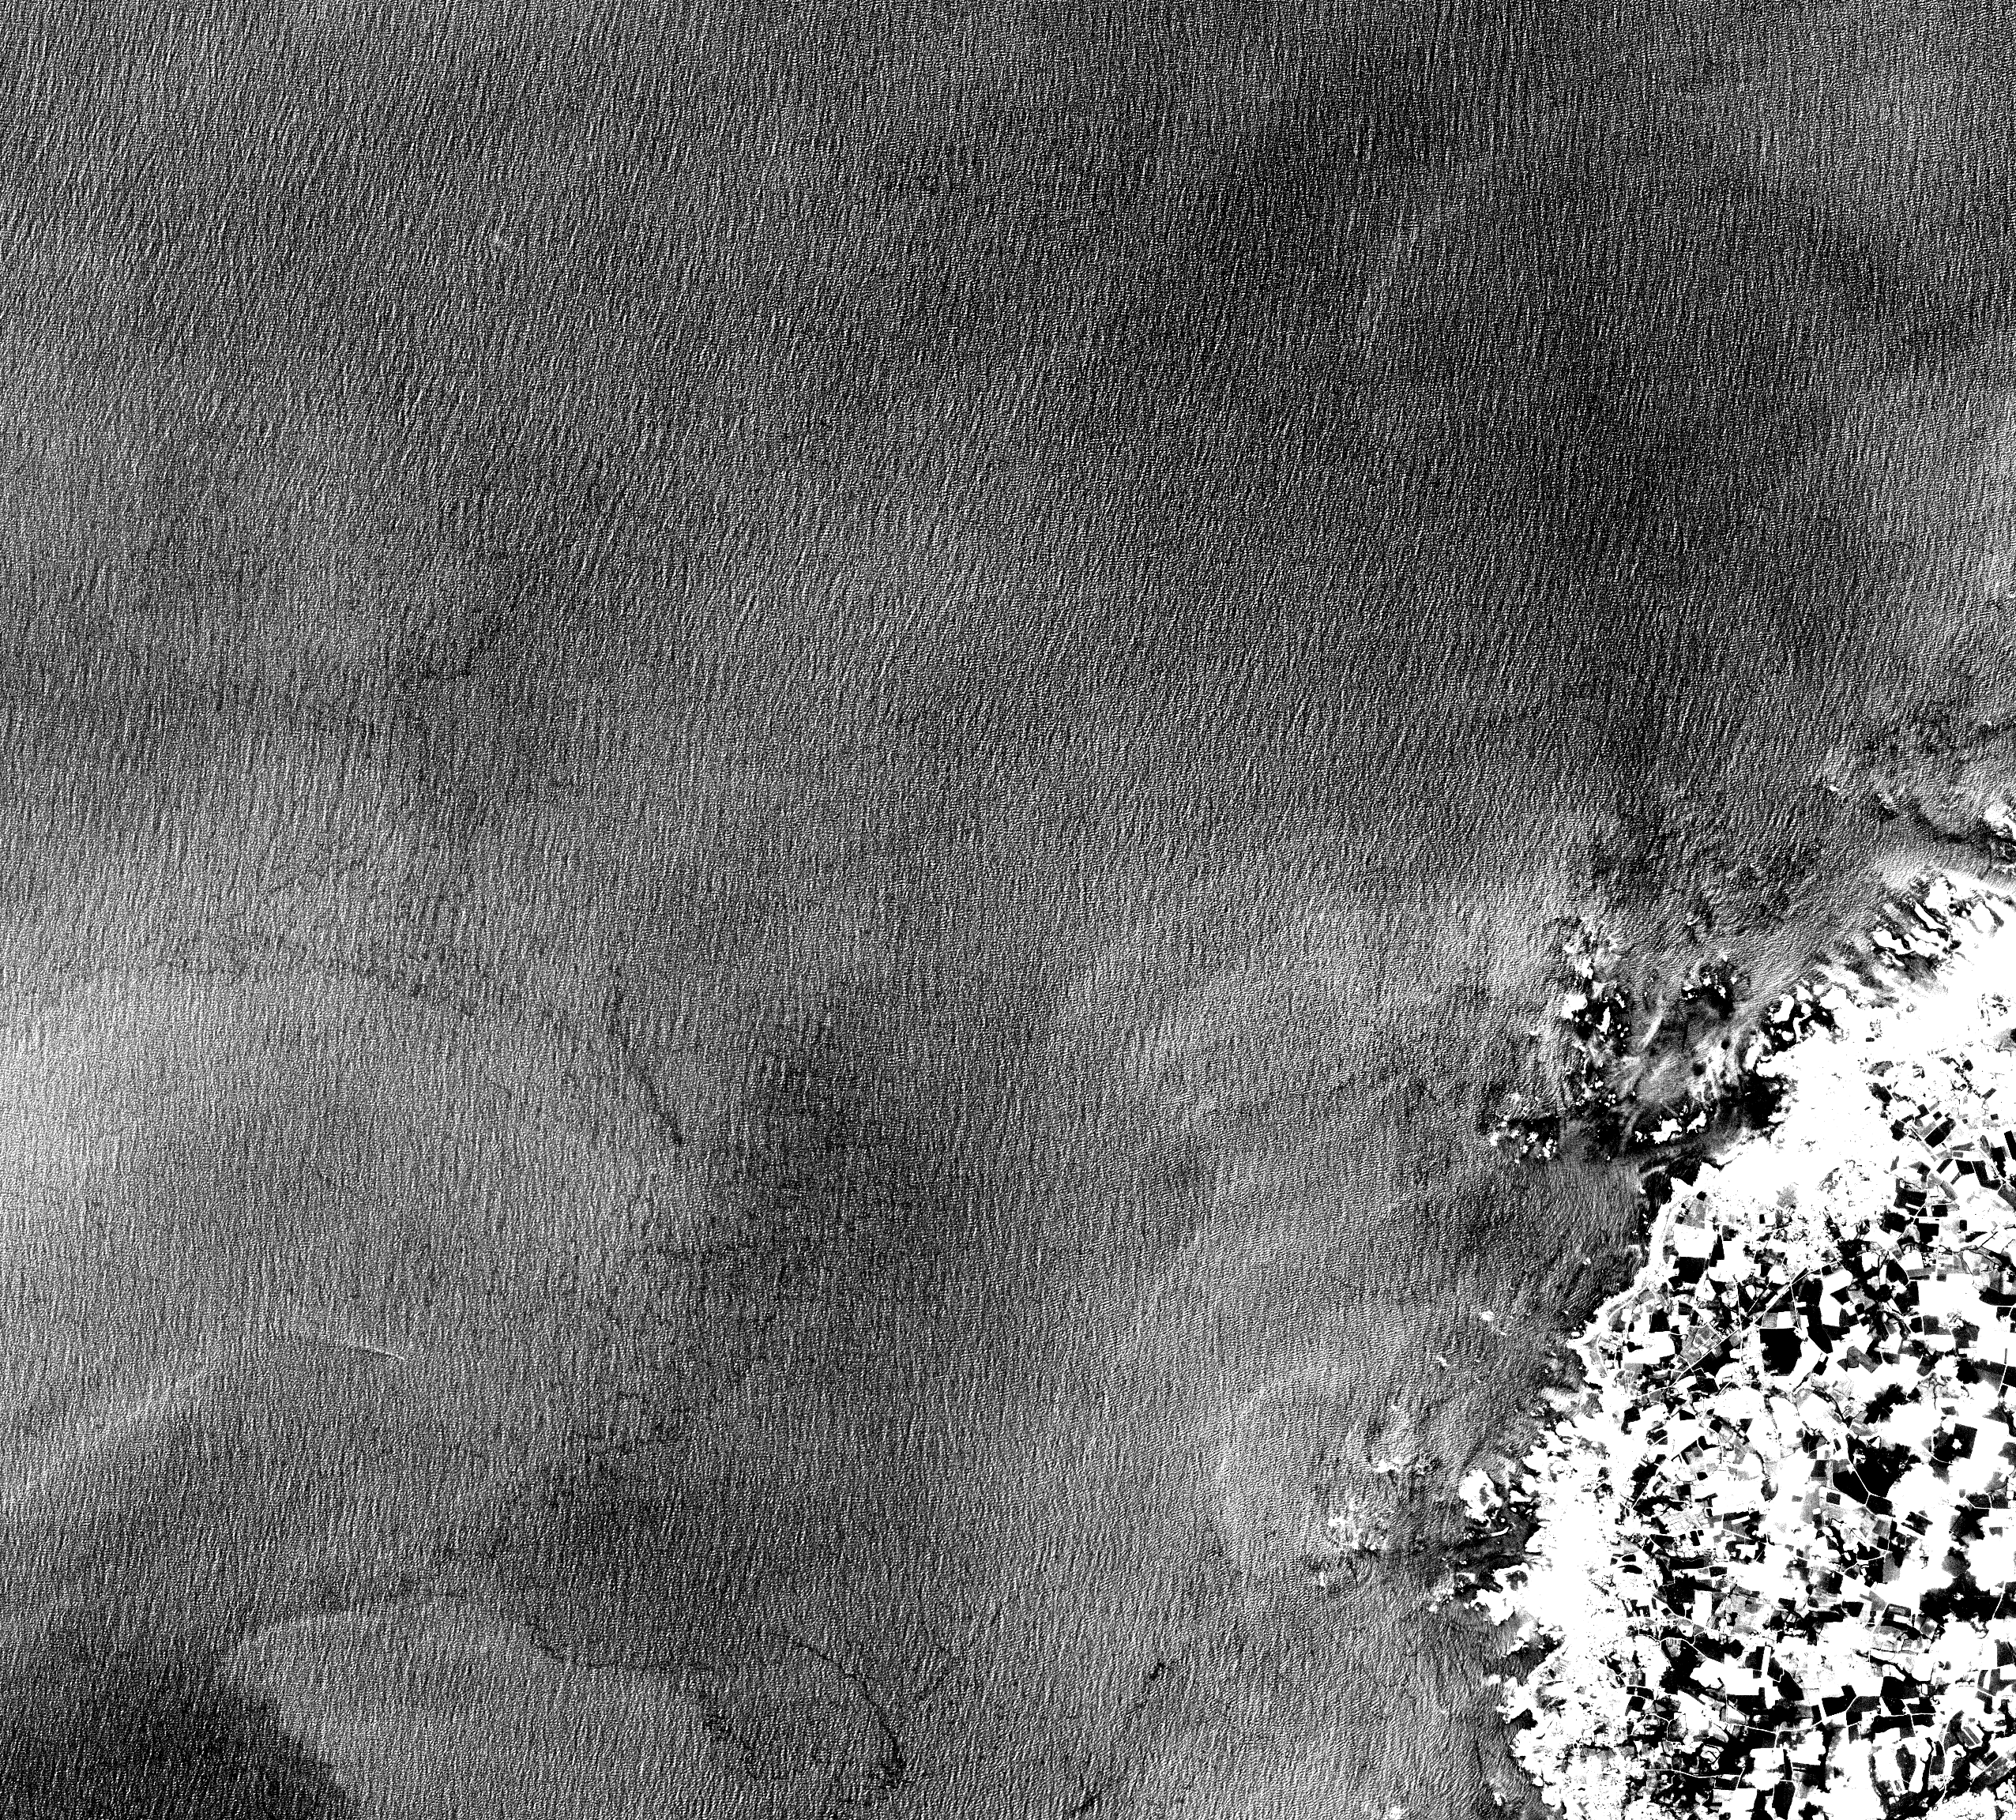

In [10]:
import folium

# Find the corners for the image overlay
lat_min, lat_max = float(lat_win.min()), float(lat_win.max())
lon_min, lon_max = float(lon_win.min()), float(lon_win.max())

# Map centered at Lanildut
m = folium.Map(location=[lat0, lon0], zoom_start=13, tiles="OpenStreetMap")

# Overlay the image
image_bounds = [[lat_min, lon_min], [lat_max, lon_max]]
folium.raster_layers.ImageOverlay(
    name="Sentinel-2 window",
    image="s2_window.png",
    bounds=image_bounds,
    opacity=0.6,
    interactive=True,
    cross_origin=False,
    zindex=1,
).add_to(m)

# Add a marker for Lanildut
folium.Marker([lat0, lon0], popup="Lanildut", icon=folium.Icon(color="red")).add_to(m)

m.save("lanildut_sentinel2_map.html")
m  # In Jupyter, this will display the interactive map!